## **Import Libraries**


In [1384]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error

## Get heads of both dataset

In [1385]:
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

In [1386]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1387]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Getting the information about both test and train dataset

In [1388]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1389]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Getting the sum of empty data in each columns

In [1390]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1391]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Getting the descriptive statistics of our dataset

In [1392]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1393]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1394]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [1395]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [1396]:
train_data['Age'].isnull().sum()

0

In [1397]:
train_data['Embarked'].fillna(train_data['Embarked'].mode(),inplace=True)

In [1398]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

##  Lists of columns in our dataset

In [1399]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1400]:
train_data['Embarked'].isnull().sum()

2

In [1401]:
test_data['Fare'].isnull().sum()

0

In [1402]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Counting the people that survived and people who didn't survived

In [1403]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**There more people who do not survive**

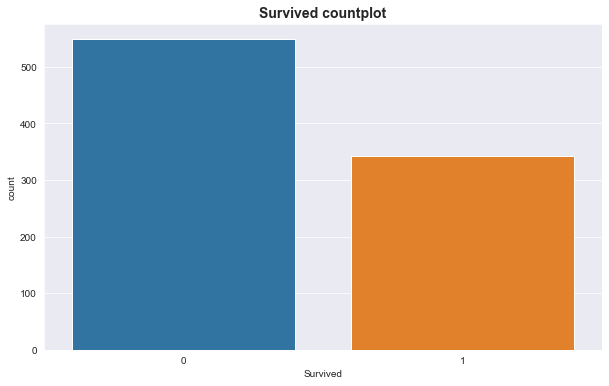

In [1404]:
plt.figure(figsize=(10,6))
sns.countplot(x= train_data['Survived']);
plt.title('Survived countplot',fontsize=14,fontweight='bold');

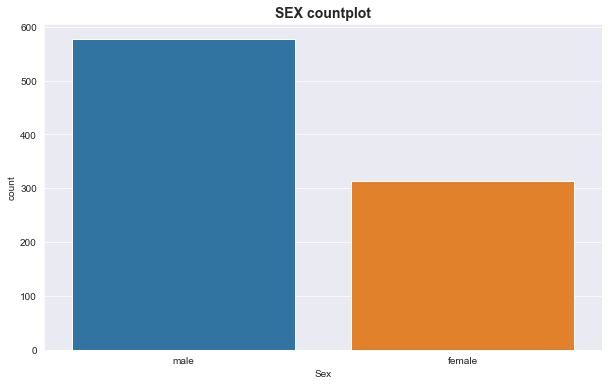

In [1405]:
plt.figure(figsize=(10,6))
sns.countplot(x= train_data['Sex']);
plt.title('SEX countplot',fontsize=14,fontweight='bold');

**Females survived more than the males** as it is seen from the survived and the sex countplot

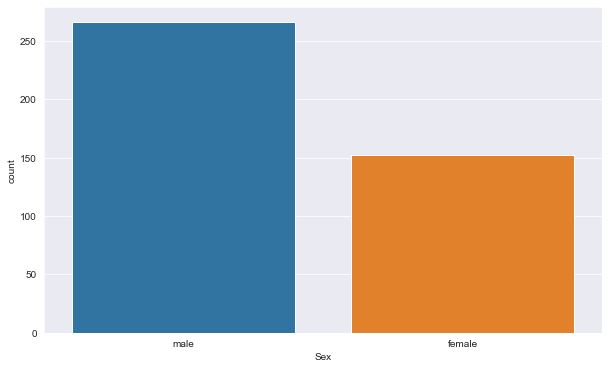

In [1406]:
plt.figure(figsize=(10,6))
sns.countplot(x= test_data['Sex']);

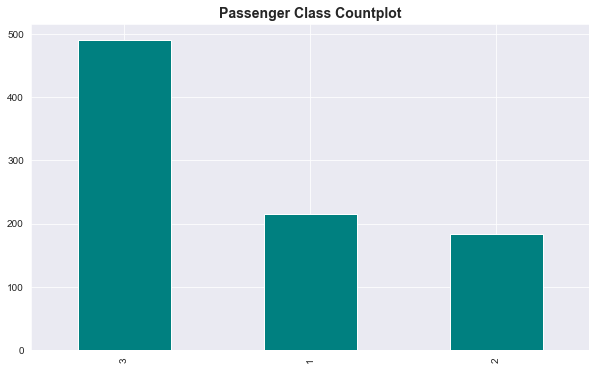

In [1407]:
plt.figure(figsize=(10,6))
train_data['Pclass'].value_counts().plot(kind='bar',color='teal');
plt.title('Passenger Class Countplot',fontsize=14,fontweight='bold');

**Many people could only afford third class** It seems the cheapest

<Figure size 432x720 with 0 Axes>

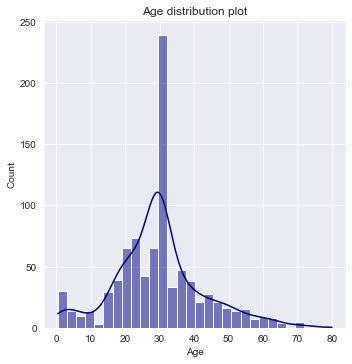

In [1408]:
plt.figure(figsize=(6,10))
sns.displot(x=train_data['Age'],kde=True,color='darkblue')
plt.title('Age distribution plot');

**Majority of the people on board are 30 years old** as it is seen on the distribution plot

In [1409]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [1410]:
test_data['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [1411]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [1412]:
test_data['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [1413]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1414]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

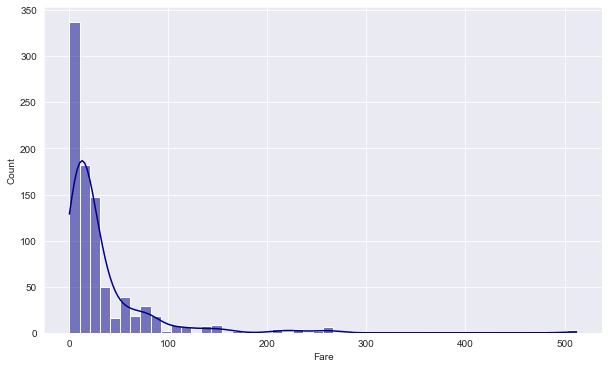

In [1415]:
plt.figure(figsize=(10,6))
sns.histplot(x=train_data['Fare'],bins=50,color='darkblue',kde=True);

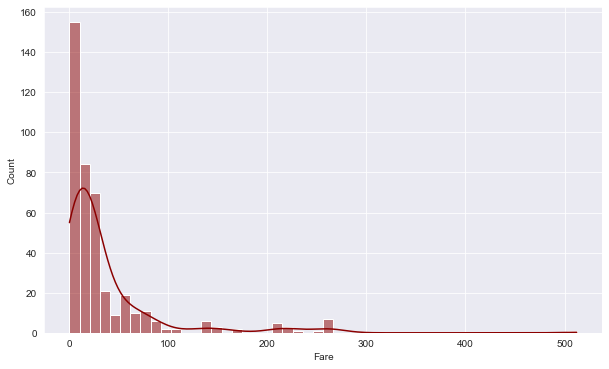

In [1416]:
plt.figure(figsize=(10,6))
sns.histplot(x=test_data['Fare'],bins=50,color='darkred',kde=True);

In [1417]:
train_data['Cabin'].nunique()

147

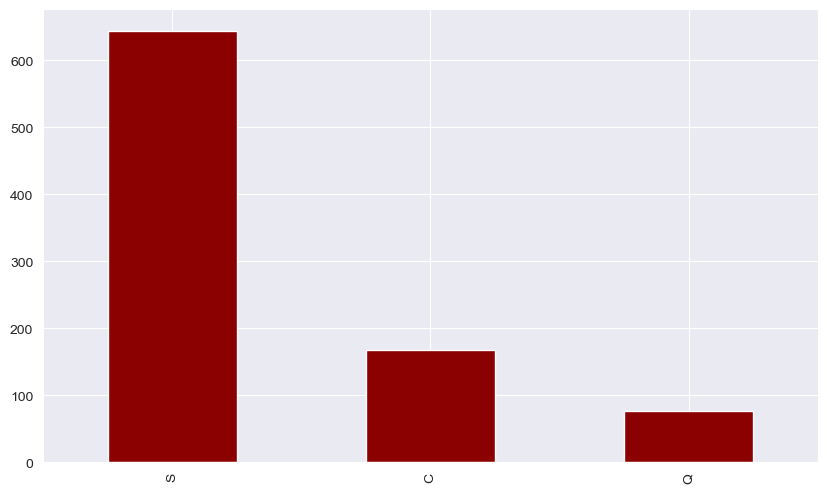

In [1418]:
plt.figure(figsize=(10,6),dpi=100)
train_data['Embarked'].value_counts().plot(kind='bar',color='darkred');

## **NUMERICAL COLUMNS IN OUR DATASET**

In [1419]:
train_data.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


## Categorical Columns in our dataset

In [1420]:
train_data.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [1421]:
test_data.select_dtypes(include='number')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


In [1422]:
test_data.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
416,"Ware, Mr. Frederick",male,359309,NaN,S


## **Correlation Table of each variables with one another**

In [1423]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [1424]:
test_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.030874,0.003818,0.043080,0.008209
Pclass,-0.026751,1.000000,-0.440782,0.001087,0.018721,-0.576619
Age,-0.030874,-0.440782,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.003818,0.001087,-0.079535,1.000000,0.306895,0.171488
Parch,0.043080,0.018721,-0.045073,0.306895,1.000000,0.230001
Fare,0.008209,-0.576619,0.326800,0.171488,0.230001,1.000000


In [1425]:
mask = np.zeros_like(train_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

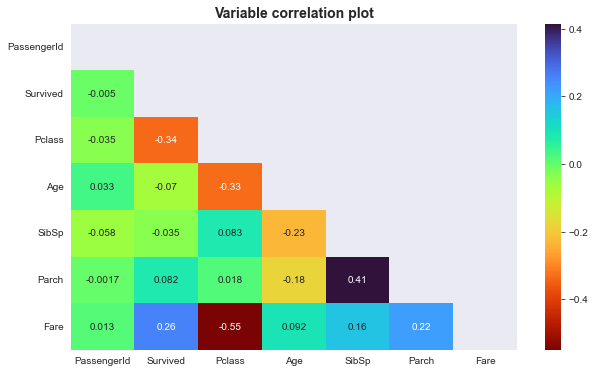

In [1426]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True,
            cmap='turbo_r',linecolor='red',mask=mask, annot_kws= {'size':10});
plt.title('Variable correlation plot',fontsize=14,fontweight='bold');

In [1427]:
round(train_data['Survived'].corr(train_data['Pclass']),3)

-0.338

pclass_survd_corr = round(train_data['Survived'].corr(train_data['Pclass']), 3)

plt.figure(figsize=(10,6))
plt.scatter(x=train_data['Pclass'], y=train_data['Survived'], alpha=0.6, s=80, color='indigo')

plt.title(f'Survived vs Pclass (Correlation {pclass_survd_corr})', fontsize=14)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Pclass', fontsize=14)
plt.show()

## **Dropping Columns that are not necessary**

In [1428]:
train_data.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True,axis=1)

In [1429]:
test_data.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True,axis=1)

In [1430]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1431]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [1432]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [1433]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [1434]:
train_data['Sex']= encoder.fit_transform(train_data['Sex'])
train_data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [1435]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [1436]:
test_data['Sex']= encoder.fit_transform(test_data['Sex'])
test_data['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [1437]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [1438]:
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])
train_data['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [1439]:
test_data['Embarked'] = encoder.fit_transform(test_data['Embarked'])
test_data['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32

In [1440]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [1441]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [1442]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1443]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [1444]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error

In [1445]:
y = train_data['Survived'].values
X = train_data.drop(columns=['Survived']).values

In [1446]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [1447]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  =  sc.fit_transform(X_test)

In [1448]:
from sklearn.ensemble import RandomForestClassifier

In [1449]:
rand = RandomForestClassifier()
rand

RandomForestClassifier()

In [1450]:
regr = LogisticRegression()
regr

LogisticRegression()

In [1451]:
regr.fit(X_train,y_train)

LogisticRegression()

In [1452]:
print('Training data r-squared:', regr.score(X_train, y_train))

Training data r-squared: 0.7963483146067416


In [1453]:
y_pred = regr.predict(X_test)
pd.Series(y_pred).value_counts()

0    118
1     61
dtype: int64

In [1454]:
y_pred_train = regr.predict(X_train)
y_pred_series = pd.Series(y_pred_train)
y_pred_series.value_counts()

0    459
1    253
dtype: int64

In [1455]:
accuracy_score(y_train,regr.predict(X_train))

0.7963483146067416

## 79.6% of the prediction on the train dataset is predicted by the features

In [1462]:
accuracy_score(y_test,regr.predict(X_test))

0.8268156424581006

## 82.6% of the prediction on the test dataset is predicted by the features

## Confusion matrix as a means of model evaluation

In [1457]:
confusion_matrix(y_train,regr.predict(X_train))

array([[373,  59],
       [ 86, 194]], dtype=int64)

## There are many correct predictions by the model than the incorrect ones i.e 385 and 186 
## respectively

In [1458]:
confusion_matrix(y_test,regr.predict(X_test))

array([[102,  15],
       [ 16,  46]], dtype=int64)

## There are many correct predictions by the model than the incorrect ones i.e 91 and 53 
## respectively

In [1459]:
test_pred = regr.predict(test_data)
pd.Series(test_pred).value_counts()

0    411
1      7
dtype: int64

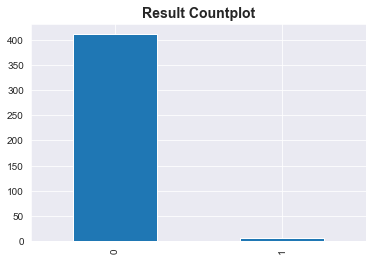

In [1460]:
test_pred = regr.predict(test_data)
pd.Series(test_pred).value_counts().plot(kind='bar')
plt.title('Result Countplot',fontweight='bold',fontsize=14);

In [1461]:
result = pd.DataFrame({'Survived':test_pred})
result

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0
